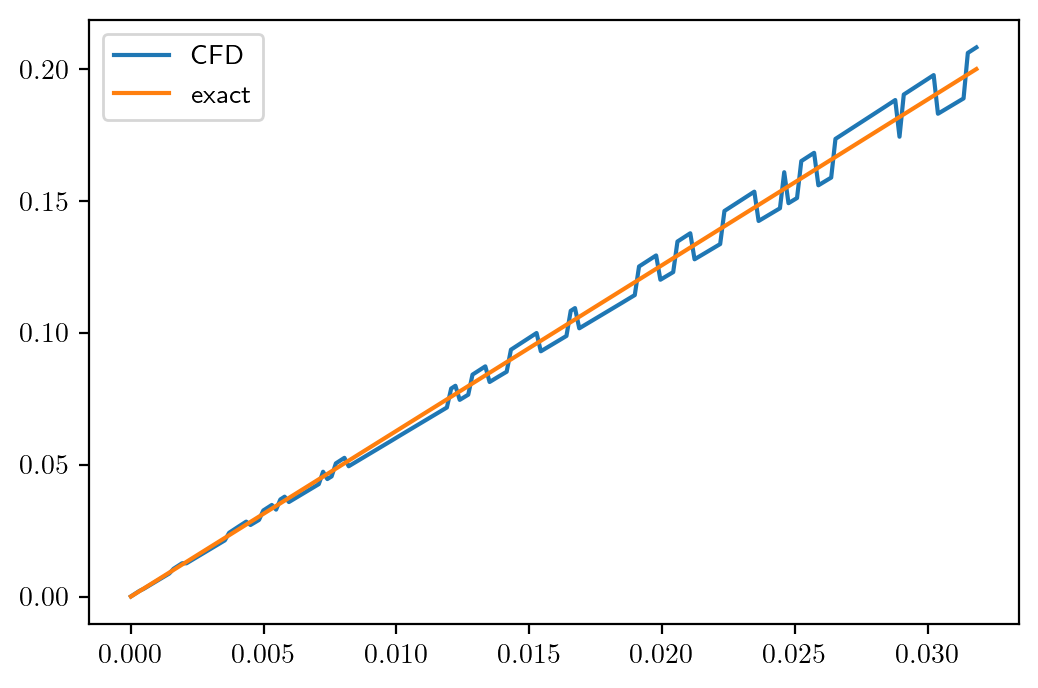

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams

#rcParams["figure.dpi"] = 200
#rcParams["text.usetex"] = True

# Define the analytic velocity function
def calc_analytic_velocity(r,z, lambdaB, lambdaT, h, omega):
    # TODO(HBG): implement 
    return omega*r*(z+lambdaB)/(h+lambdaB+lambdaT)

# Find the folder from the last iteration
case_dir = "../partialSlipStudy/wedgeFstPartialSlip/"
post_proc_dir = os.path.join(case_dir, "postProcessing/sampleLine")
time_step_dirs = [int(folder) for folder in os.listdir(post_proc_dir)] 
time_step_dirs.sort()
last_time_step = str(time_step_dirs[-1])

data_path = os.path.join(post_proc_dir,last_time_step)
data_file = os.path.join(data_path, "data_U.csv")
# Read the data as CSV into a Pandas DataFrame
data = pd.read_csv(data_file)

# Initialize the analytic velocity field
exact_vel_data = np.zeros(len(data))

#define Parameters
z=2.5e-6;
h=5e-6;
lambdaB=540e-9;
lambdaT=540e-9;
omega=12.566;
# Calculate analytical velocity field

for i in range(len(exact_vel_data)):
    exact_vel_data[i] = calc_analytic_velocity(data["x"][i],z, lambdaB, lambdaT, h, omega)

# Plot analytical field
plt.plot(data["x"], data["U_1"], label="CFD")
plt.plot(data["x"], exact_vel_data, label="exact")
plt.legend()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x800 with 1 Axes>